# Hypothesis Testing - Overview Exercises
Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?

$H_{0}$ : There is no difference in network latency since we switched internet service providers.

$H_{\alpha}$ There has been an improvement in network latency since we switched internet service providers.

True Positive: If we reject $H_{0}$ and there is no difference in network latency.

True Negative: If we reject $H_{0}$ and there is an improvement in network latency.

Type I error (false positive): If we reject $H_{0}$ and that there is no difference in network latency. 

Type II error (false negative): If we fail to reject $H_{0}$ and that there is an improvement in network latency.


### 2. Is the website redesign any good?

$H_{0}$: There is no difference in website performance since the redesign. 

$H_{\alpha}$ There is an improvement in website performance since the redesign.

True Positive: If we reject $H_{0}$ and there is no difference in website performance.

True Negative: If we reject $H_{0}$ and there is an improvement in website performance.

Type I error: If we reject $H_{0}$ and that there is no difference in website performance. 

Type II error: If we fail to reject $H_{0}$ and that there is an improvement in website performance.

### 3. Is our television ad driving more sales?

$H_{0}$:  There is no difference in sales since airing the television ad.

$H_{\alpha}$:  There is an increase in sales since airing the television ad.

True Negative: If we fail to reject $H_{0}$ and there is no difference in sales.

True Postive: If we reject $H_{0}$ and there is an increase in sales.

Type I error: If we reject $H_{0}$ and that there is no difference in sales. 

Type II error: If we fail to reject $H_{0}$ and that there is an increase in sales.

### $chi^2$ Exercises

In [126]:
import numpy as np
import pandas as pd

from pydataset import data
from scipy import stats

## Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 				Codeup Student	Not Codeup Student
	Uses a Macbook		49		20
	Doesn't Use A Macbook	1		30

### Form hypothesis

$H_o$: there is no association between being a codeup student and using a macbook

$H_a$: there is a association between being a codeup student and using a macbook

In [127]:
alpha = 0.05

### Make contigency tables

In [128]:
observed = pd.DataFrame([[49,20],[1,30]])
observed

,0,1
0,49,20
1,1,30


### Calculate chi2 and p-value

In [129]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [130]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 1.4116760526193828e-09


### Conclude

In [131]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [132]:
#import data from pydataset
df = data('mpg')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [133]:
#look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [134]:
#use .nunique to see which columns have categorical variables
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [135]:
#look at year data
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [136]:
#look at cyl data
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

### Form hypothesis

$H_o$: there is no association between the car year and cylinder

$H_a$: there is a association between the car year and cylinder

### Make contigency table

In [137]:
observed = pd.crosstab(df.year, df.cyl)
observed

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


### Calculate $chi^2$ and p-value

In [138]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [139]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[45  0 45 27]
 [36  4 34 43]]

Expected
[[40  2 39 35]
 [40  2 39 35]]

----
chi^2 = 10.1888
p     = 0.0170


### Conclude

In [140]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## Use the data from the employees database to answer these questions:

In [141]:
from env import get_connection
from sqlalchemy import create_engine, text

In [142]:
def get_db_url(database):
    return get_connection(database)

In [143]:
#set sql query and read in data
url = get_db_url('employees')
query = text("select emp_no, gender, dept_name from employees join dept_emp using (emp_no) join departments using (dept_no) where to_date = '9999-01-01' and dept_name in ('Marketing','Sales')")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())
df

,emp_no,gender,dept_name
0,10017,F,Marketing
1,10058,M,Marketing
2,10140,F,Marketing
3,10228,F,Marketing
4,10239,F,Marketing
...,...,...,...
52538,499966,F,Sales
52539,499976,M,Sales
52540,499980,M,Sales
52541,499986,F,Sales


In [144]:
#view gender data
df.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [145]:
#view dept_name data
df.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [146]:
#create contigency table
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [147]:
#calculate chi2 and p-value
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [148]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [149]:
#conclude
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


## Is an employee's gender independent of whether or not they are or have been a manager?

$H_o$: there is no association between being a persons gender and being a manager

$H_a$: there is a association between being a persons gender and being a manager

In [150]:
#set sql query and read in data
url = get_db_url('employees')
query = text("SELECT emp_no, gender, dept_no FROM employees LEFT JOIN dept_manager USING (emp_no)")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())
df

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [151]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [152]:
#look at dept_no data
df.dept_no.value_counts(dropna=False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [153]:
#fill in nulls
df.dept_no = df.dept_no.fillna('not manager')

In [154]:
df.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [155]:
#make new column using np.where
# np.where( condtion, this happens when true, this happens when false)
df.dept_no = np.where( df.dept_no != 'not manager', 'manager', 'not manager')

In [156]:
df.dept_no.value_counts()

not manager    300000
manager            24
Name: dept_no, dtype: int64

In [157]:
#create contigency table
observed = pd.crosstab(df.gender, df.dept_no)
observed

dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [158]:
#calculate chi2 and p-value
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [159]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[    13 120038]
 [    11 179962]]

Expected
[[     9 120041]
 [    14 179958]]

----
chi^2 = 1.4567
p     = 0.2275


In [160]:
#conclude
if p < alpha:
    print('We reject the null hypothesis')
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


---
# Correlation Exercises

Continue working in your hypothesis_testing notebook.

1. Answer with the type of stats test you would use (assume normal distribution):

* Is there a relationship between the length of your arm and the length of your foot?
                Pearson R

* Does smoking affect when or not someone has lung cancer?
                $chi^2$

* Is gender independent of a person’s blood type?
                $chi^2$

* Does whether or not a person has a cat or dog affect whether they live in an apartment?
                $chi^2$
                
* Does the length of time of the lecture correlate with a student's grade?
                 Pearson R


2. Use the telco_churn data.
* Does tenure correlate with monthly charges?
* Total charges?
* What happens if you control for phone and internet service?

3. Use the employees database.
* Is there a relationship between how long an employee has been with the company and their salary?
* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

4. Use the sleepstudy data.
* Is there a relationship between days and reaction time?

In [161]:
from env import get_connection
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text, create_engine

---
<div class="alert alert-block alert-info">

1. Answer with the type of stats test you would use (assume normal distribution)

* Is there a relationship between the length of your arm and the length of your foot?

* Does smoking affect when someone has lung cancer?        

* Is gender independent of a person's blood type? 

* Does whether or not a person has a cat or dog affect whether they live in an apartment?

* Does the length of time of the lecture correlate with a students grade?


---
<div class="alert alert-block alert-info">
2. Use the telco_churn data

* Does tenure correlate with monthly charges?
* Total charges?
* What happens if you control for phone and internet service?

In [162]:
def get_db_url(database):
    return get_connection(database)

url = get_db_url('telco_churn')
query = ('SELECT * FROM customers')
engine = create_engine(url)

In [163]:
df = pd.read_sql(query, engine.connect())
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


<div class="alert alert-block alert-info">
A. Does tenure correlate with monthly charges?

Hypothesis:

$H_0$: there is no linear correlation between tenure and monthly charges.

$H_a$: there is a linear correlation between tenure and monthly charges. 

<Axes: xlabel='tenure', ylabel='monthly_charges'>

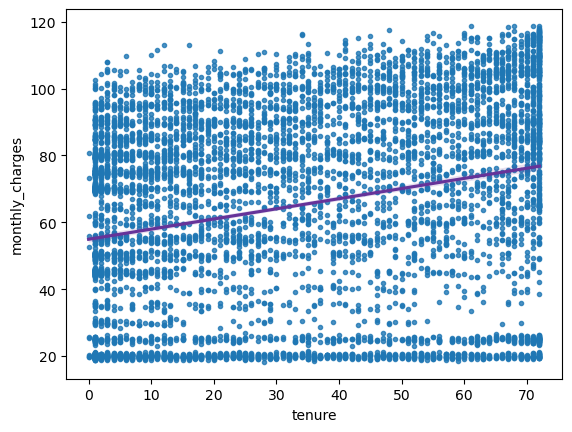

In [164]:
# select the data
charges_df = df[['monthly_charges', 'tenure']]

# plot the data
sns.regplot(x='tenure', y='monthly_charges', data=charges_df, marker='.', line_kws={'color': 'rebeccapurple'})

<Axes: >

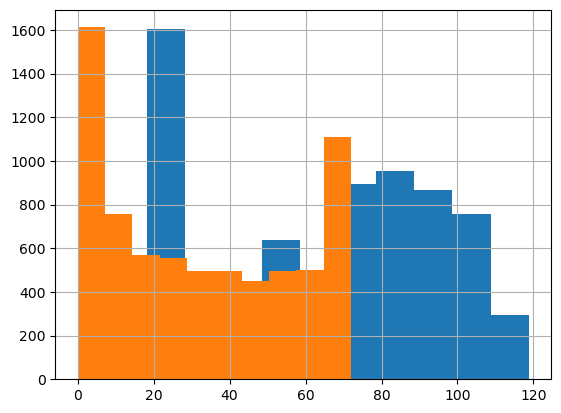

In [165]:
# distributions of the data to check for normalcy
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

In [166]:
alpha = 0.05
r, p = stats.pearsonr(charges_df.tenure, charges_df.monthly_charges)

def eval_result(alpha, p):
    if p < alpha:
        return print(f'Reject the null hypothesis. There is a linear correlation (p-value: {p})')
    else:
        return print(f'We fail to reject the null hypothesis that there is a linear correlation (p-value: {p})')

In [167]:
eval_result(alpha, p)
r

Reject the null hypothesis. There is a linear correlation (p-value: 4.094044991476844e-99)


0.24789985628615246

<div class="alert alert-block alert-success">

**Takeaways**

There is a correlation between monthly charges and tenure. 
With an r of .24, we can say the correlation is "weak-moderate"

<div class="alert alert-block alert-info">
B. Does tenure correlate with total charges?

Hypothesis: 

$H_0$ : There is no linear correlation between tenure and total charges.

$H_a$ : There is a linear correlation between tenure and total charges.

In [168]:
alpha = 0.05

# select the data
ttl_charges_df = df[['tenure', 'total_charges']]

# look at a summary of the dataframe
# ttl_charges_df.info()

# try to find the data errors
ttl_charges_df.total_charges.sort_values()

# convert the empty space to '0'
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

# confirm our datatypes
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


/var/folders/k8/ltyv8jfd0b54p8nfncshc01w0000gn/T/ipykernel_8976/3437671544.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


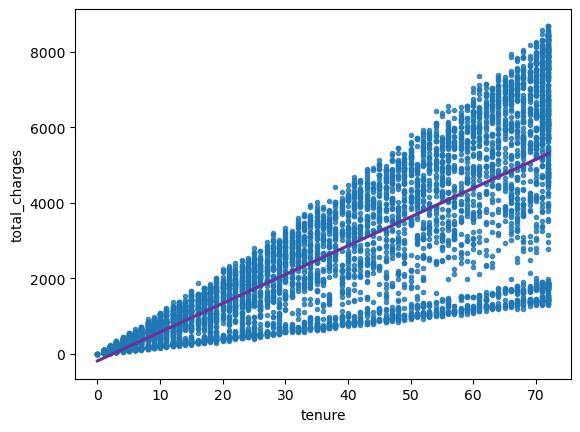

In [169]:
# plot the data
sns.regplot(x = 'tenure', y='total_charges', data = ttl_charges_df, marker='.', line_kws={'color': 'rebeccapurple'})
plt.show()

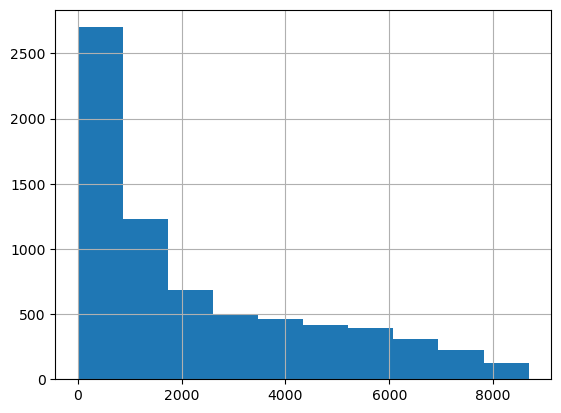

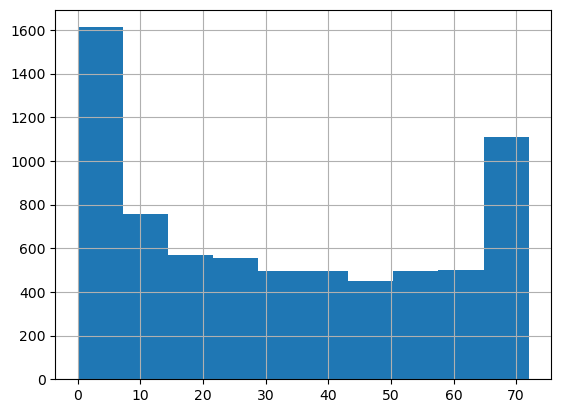

In [170]:
# check assumptions
ttl_charges_df.total_charges.hist()
plt.show()
ttl_charges_df.tenure.hist()
plt.show()

In [171]:
# run our test
r, p = stats.pearsonr(ttl_charges_df.tenure, ttl_charges_df.total_charges)

eval_result(alpha, p)

r

Reject the null hypothesis. There is a linear correlation (p-value: 0.0)


0.8261783979502481

<div class="alert alert-block alert-success">
**Takeaway**

* There is a linear correlation between tenure and total charges. 

* With an r of .83, the correlation is strong. 

<div class="alert alert-block alert-info">
C. What happens if you control for phone and internet service?

Hypothesis:

$H_0$ : there is no linear correlation between tenure and monthly charges. 

$H_a$ : there is a linear correlation between tenure and monthly charges.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


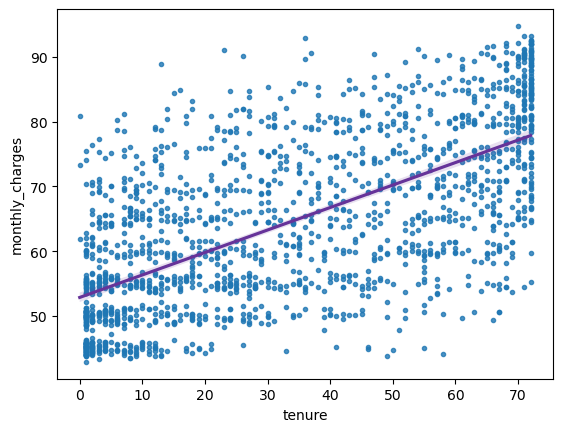

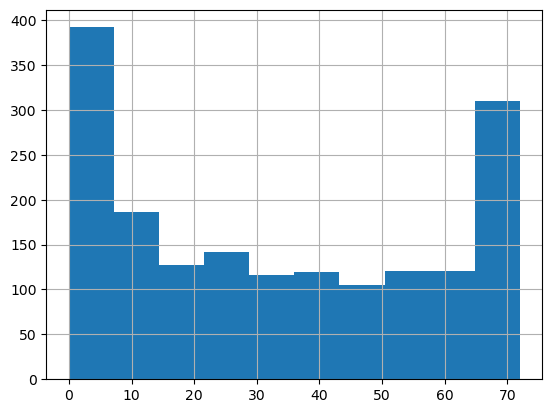

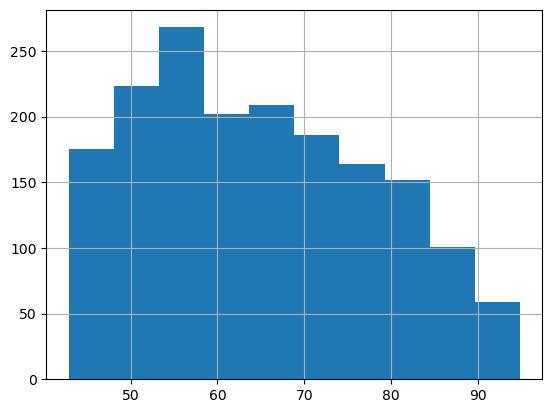

In [172]:
# set alpha
alpha = 0.05

# select the data
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

# look at info
phone_df.info()

# plot the data
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', 
            line_kws=({'color': 'rebeccapurple'}))
plt.show()

# check for normal distribution

phone_df.tenure.hist()
plt.show()

phone_df.monthly_charges.hist()
plt.show()

In [173]:
r, p = stats.pearsonr(phone_df.tenure, phone_df.monthly_charges)

eval_result(alpha, p)

print(f'r value = {r}')

Reject the null hypothesis. There is a linear correlation (p-value: 5.6762026836261174e-214)
r value = 0.6553845618157271


<div class="alert alert-block alert-success">
**Takeaways**

* There is a moderate-strong correlation betwen tenure and monthly charges for customers who have only phone service. 

---
<div class="alert alert-block alert-info">

**3. Use the employees database.**

* Is there a relationship between how long an employee has been with the company and their salary?

* Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [174]:
url = get_db_url('employees')

query = ("SELECT * FROM employees JOIN salaries USING (emp_no) WHERE to_date = '9999-01-01';")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


<div class="alert alert-block alert-success">
A. Is there a relationship between an employee's tenure and their salary?

Hypothesis: 

$H_0$: there is no linear correlation between employee tenure and salary. 

$H_a$: there is a linear correlation between employee tenure and salary. 

<Axes: xlabel='tenure', ylabel='salary'>

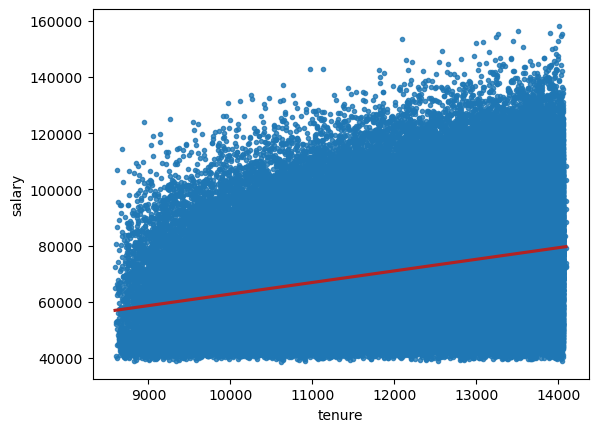

In [175]:
alpha = 0.05

# select our data, calculate tenure
df['tenure'] = pd.to_datetime("today") - pd.to_datetime(df.hire_date) # ddddd hh:mm:ss

df['tenure'] = df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')

# df.info()
tenure_df = df[['tenure', 'salary']]

# plot the data
sns.regplot(x='tenure', y='salary', data=tenure_df, marker='.',  line_kws=({'color': 'firebrick'}))
#plt.axhline(y=np.nanmean(df.y))


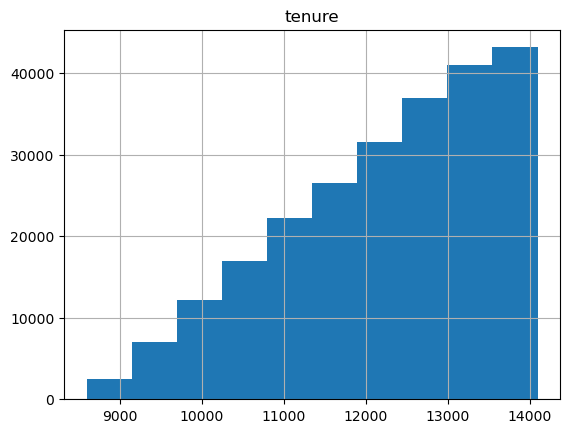

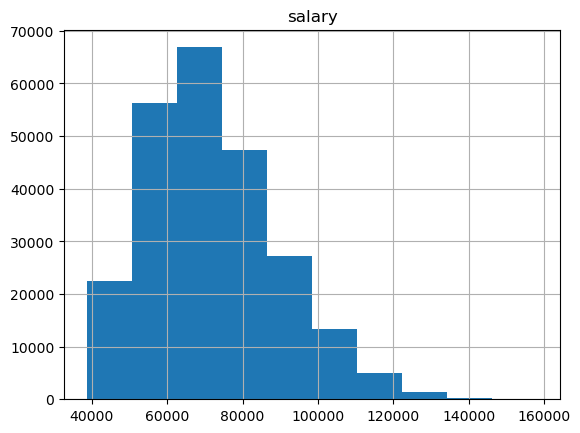

In [176]:
# look at the distribution, look for normality

tenure_df.tenure.hist()
plt.title('tenure')
plt.show()
tenure_df.salary.hist()
plt.title('salary')
plt.show()

In [177]:
# run the test
r, p = stats.pearsonr(tenure_df.tenure, tenure_df.salary)

# evaluate results
eval_result(alpha, p)

print('r value: ', r)

Reject the null hypothesis. There is a linear correlation (p-value: 0.0)
r value:  0.3064625613186014


<div class="alert alert-block alert-success">
**Takeaways**

* There is a moderate correlation between tenure and salary. 

<div class="alert alert-block alert-info">

Is there a relationship between employee tenure and the number of titles they have had?

Hypothesis: 

$H_0$ : there is no linear correlation between tenure and number of titles. 

$H_a$ : there is a linear correalation between tenure and number of titles. 

In [178]:
alpha = 0.05

# select the data
url = get_db_url('employees')

query = text("SELECT t.emp_no, COUNT(t.title) AS num_titles, te.tenure FROM titles t JOIN (select emp_no, datediff(now(), min(from_date)) AS tenure FROM titles GROUP BY emp_no HAVING max(to_date) = '9999-01-01') te USING (emp_no) GROUP BY t.emp_no;")
engine = create_engine(url)
df = pd.read_sql(query, engine.connect())

df.head()

,emp_no,num_titles,tenure
0,10001,1,13552
1,10002,1,9861
2,10003,1,10105
3,10004,2,13394
4,10005,2,12378


<Axes: xlabel='tenure', ylabel='num_titles'>

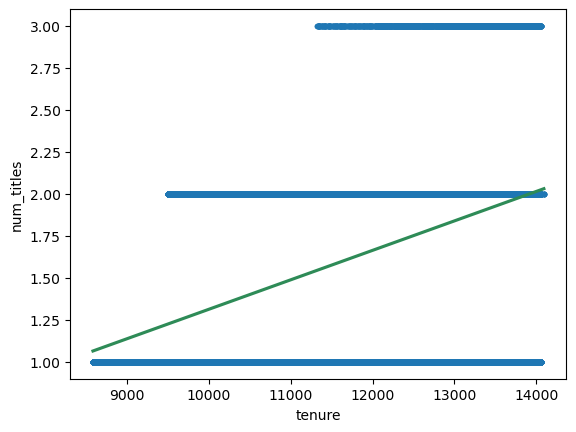

In [179]:
df = df[['num_titles', 'tenure']]

# plot the data
sns.regplot(x='tenure', y='num_titles', data=df, marker='.', line_kws=({'color': 'seagreen'}))

In [180]:
# observatations:
df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

In [181]:
r, p = stats.pearsonr(df.tenure, df.num_titles)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

r, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.5311014974074266, 0.0)

<div class="alert alert-block alert-success">

**Takeaways**

* There is a difference in tenure and number of titles an employee has held. 

---
<div class="alert alert-block alert-info">

**4. Use the sleepstudy data**

A. Is there a relationship between days and reaction time?

In [182]:
from pydataset import data
df = data('sleepstudy')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


Hypothesis: 

* $H_0$: there is no linear correlation between days and reaction time

* $H_a$: there is a linear correlation between days and reaction time



<Axes: xlabel='Days', ylabel='Reaction'>

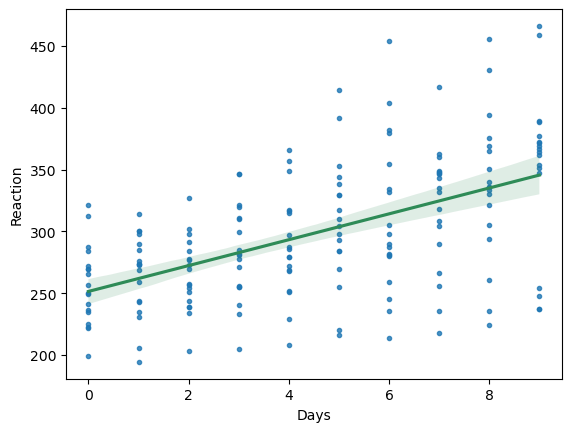

In [183]:
alpha = 0.05

# select the data
df = df[['Reaction', 'Days']]

# plot the data
sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws=({'color':'seagreen'}))

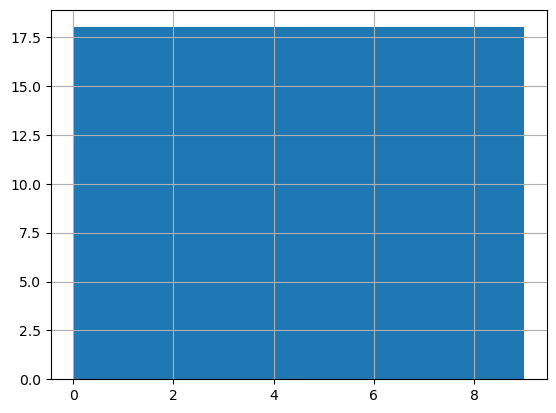

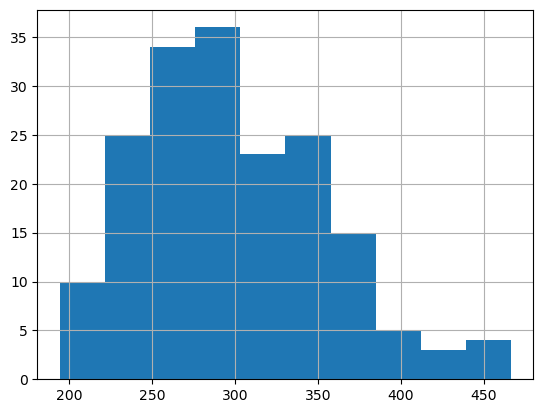

In [184]:
# check for normal distribution, plot histograms
df.Days.hist()
plt.show()

df.Reaction.hist()
plt.show()

Days is uniformly distributed, and reaction time is normally distributed. 

In [185]:
# run the spearman test
r, p = stats.spearmanr(df.Days, df.Reaction)
eval_result(alpha, p)
print('r value: ', r)

Reject the null hypothesis. There is a linear correlation (p-value: 5.132878057706873e-14)
r value:  0.5228138502259547


<div class="alert alert-block alert-info">
**Takeaways**

* There is a moderate correlation between days and reaction time. 